In [25]:
import pandas as pd
import os

# Base directory where all the Tp{t}_mcesdf.csv files are stored
data_dir = '/home/priya/Desktop/fyp/Src alwin/Src/data/S68.SI'  # No {t} here

# Store results here
all_top_features = []

# Loop through t+1 to t+13
for t in range(1, 14):
    file_name = f'Tp{t}_mcesdf.csv'
    file_path = os.path.join(data_dir, f'Tp{t}', file_name)

    try:
        # Read the MCES result file
        df = pd.read_csv(file_path)

        # Add model name
        df['model'] = f't+{t}'

        # Get the feature with highest weighted score
        top_feature = df.sort_values(by='weighted_scores', ascending=False).iloc[0]

        all_top_features.append({
            'Model': f't+{t}',
            'Top Feature': top_feature['cols'],
            'Weighted Score': top_feature['weighted_scores']
        })

    except FileNotFoundError:
        print(f'File {file_path} not found, skipping...')

# Convert results to DataFrame
top_features_df = pd.DataFrame(all_top_features)

# Display or export
print(top_features_df)

# Optional: save to CSV
top_features_df.to_csv('top_mces_features_by_model.csv', index=False)


   Model     Top Feature  Weighted Score
0    t+1     x_Tm2_PRoc1        0.006572
1    t+2    x_Tm8_VolChg        0.020338
2    t+3   x_Tm12_VolChg        0.014204
3    t+4    x_Tm2_VolChg        0.007820
4    t+5  x_Tm1_PriceChg        0.015277
5    t+6     x_Tm8_PRoc1        0.002917
6    t+7     x_Tm4_PRoc1        0.003568
7    t+8  x_Tm8_PriceChg        0.011121
8    t+9  x_Tm1_PriceChg        0.009977
9   t+10     x_Tm6_PRoc1        0.010997
10  t+11  x_Tm2_PriceChg        0.020962
11  t+12   x_Tm11_VolChg        0.009448
12  t+13    x_Tm3_VolChg        0.011897


In [26]:
import pandas as pd
import os

# Directory containing MCES result files
data_dir = '/home/priya/Desktop/fyp/Src alwin/Src/data/S68.SI'

# List to hold top 13 features per model
top13_summary = []

# Loop through t+1 to t+13
for t in range(1, 14):
    file_name = f'Tp{t}_mcesdf.csv'
    file_path = os.path.join(data_dir, f'Tp{t}', file_name)

    try:
        df = pd.read_csv(file_path)
        df = df.sort_values(by='weighted_scores', ascending=False).head(13)

        row = {'Model': f't+{t}'}
        for i in range(13):
            row[f'Feature {i+1}'] = df.iloc[i]['cols']
            row[f'Feedback {i+1}'] = df.iloc[i]['weighted_scores']
        
        top13_summary.append(row)

    except Exception as e:
        print(f"Skipping t+{t} due to error: {e}")

# Create DataFrame
top13_df = pd.DataFrame(top13_summary)

# Clean feature names
def clean_feat(name):
    return name.replace('_', ' ').replace('Chg', '').replace('PRoc1', 'ROC').replace('Tm', 't-').replace('x', '')

for i in range(1, 14):
    top13_df[f'Feature {i}'] = top13_df[f'Feature {i}'].apply(clean_feat)

# Display or export
print(top13_df)
top13_df.to_csv('top13_mces_features_per_model.csv', index=False)


   Model   Feature 1  Feedback 1   Feature 2  Feedback 2    Feature 3  \
0    t+1     t-2 ROC    0.006572     t-9 Vol    0.001739      t-7 Vol   
1    t+2     t-8 Vol    0.020338    t-10 ROC    0.004507     t-12 Vol   
2    t+3    t-12 Vol    0.014204     t-1 Vol    0.003689     t-13 Vol   
3    t+4     t-2 Vol    0.007820     t-3 Vol    0.004765    t-2 Price   
4    t+5   t-1 Price    0.015277     t-6 ROC    0.014943      t-4 ROC   
5    t+6     t-8 ROC    0.002917     t-9 Vol    0.002637      t-7 ROC   
6    t+7     t-4 ROC    0.003568    t-10 Vol    0.002231     t-13 Vol   
7    t+8   t-8 Price    0.011121     t-8 Vol    0.010719      t-1 Vol   
8    t+9   t-1 Price    0.009977     t-8 Vol    0.004592     t-12 Vol   
9   t+10     t-6 ROC    0.010997     t-4 ROC    0.008681      t-2 ROC   
10  t+11   t-2 Price    0.020962     t-5 ROC    0.006642   t-11 Price   
11  t+12    t-11 Vol    0.009448   t-1 Price    0.007565     t-10 Vol   
12  t+13     t-3 Vol    0.011897     t-3 ROC    0.0

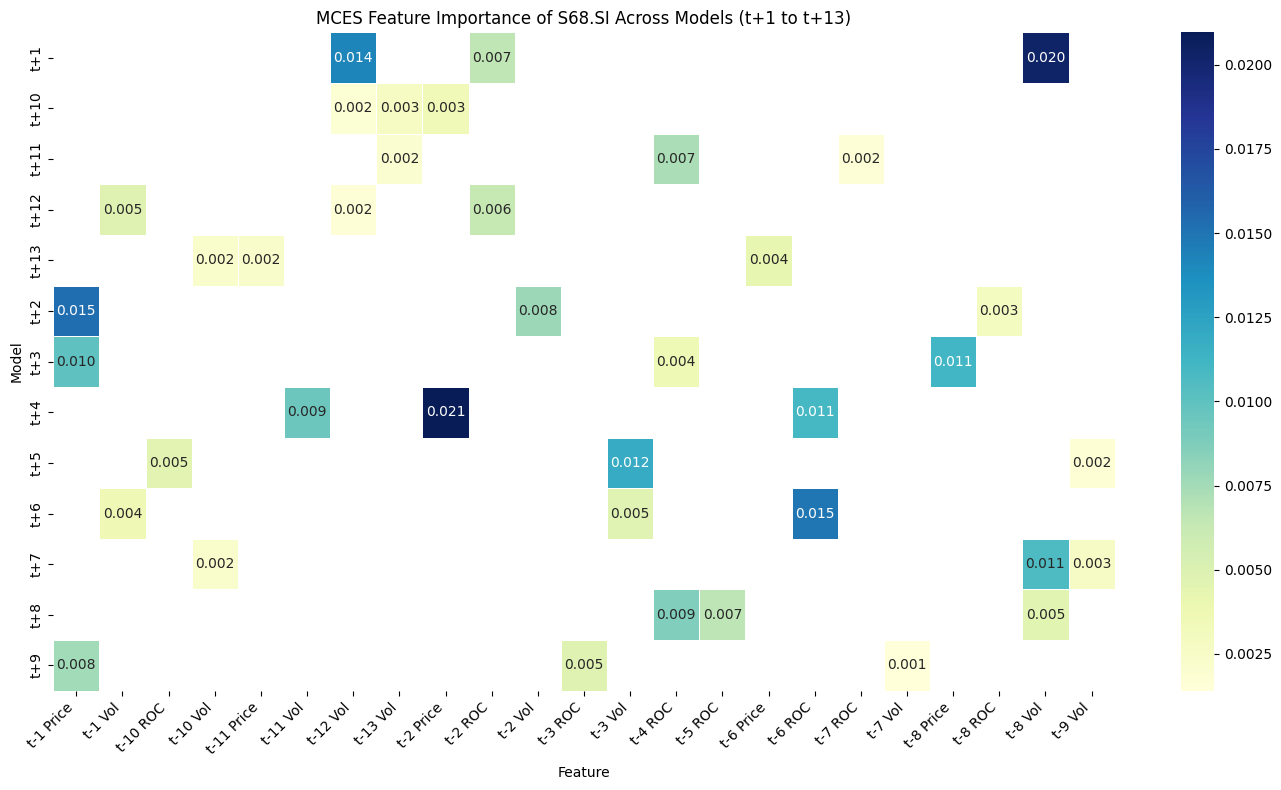

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the just-saved top3 summary CSV
top3_df = pd.read_csv("/home/priya/Desktop/fyp/Src alwin/Src/data/S68.SI/top13_mces_features_per_model.csv")

# Convert wide format to long for visualization
long_df = pd.DataFrame({
    'Model': top3_df['Model'].repeat(3).reset_index(drop=True),
    'Feature': pd.concat([top3_df['Feature 1'], top3_df['Feature 2'], top3_df['Feature 3']], ignore_index=True),
    'Feedback': pd.concat([top3_df['Feedback 1'], top3_df['Feedback 2'], top3_df['Feedback 3']], ignore_index=True)
})

# Create a pivot table for heatmap (Models as rows, Features as columns)
pivot_df = long_df.pivot_table(index='Model', columns='Feature', values='Feedback', aggfunc='first')

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, cmap="YlGnBu", annot=True, fmt=".3f", linewidths=0.5)
plt.title("MCES Feature Importance of S68.SI Across Models (t+1 to t+13)")
plt.ylabel("Model")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
import os

# Directory containing the MCES result files
data_dir = '/home/priya/Desktop/fyp/Src alwin/Src/data/S68.SI'  # No {t} here

# List to hold each model's top 3 features and their scores
top3_summary = []

# Loop through t+1 to t+13
for t in range(1, 14):
    file_name = f'Tp{t}_mcesdf.csv'
    file_path = os.path.join(data_dir, f'Tp{t}', file_name)

    try:
        df = pd.read_csv(file_path)
        df = df.sort_values(by='weighted_scores', ascending=False).head(3)

        # Format raw feature names
        row = {
            'Model': f't+{t}',
            'Feature 1': df.iloc[0]['cols'],
            'Feedback 1': df.iloc[0]['weighted_scores'],
            'Feature 2': df.iloc[1]['cols'],
            'Feedback 2': df.iloc[1]['weighted_scores'],
            'Feature 3': df.iloc[2]['cols'],
            'Feedback 3': df.iloc[2]['weighted_scores'],
        }
        top3_summary.append(row)

    except Exception as e:
        print(f"[Warning] Skipping t+{t} due to error: {e}")

# Create summary DataFrame
top3_df = pd.DataFrame(top3_summary)

# Clean feature names for readability
def clean_feat(name):
    return name.replace('_', ' ')\
               .replace('Chg', '')\
               .replace('PRoc1', 'ROC')\
               .replace('Tm', 't-')\
               .replace('x', '')\
               .strip()

for i in range(1, 4):
    top3_df[f'Feature {i}'] = top3_df[f'Feature {i}'].apply(clean_feat)

# Display the cleaned summary
print(top3_df)

# Save to CSV
output_path = os.path.join(data_dir, 'top3_mces_features_per_model.csv')
top3_df.to_csv(output_path, index=False)
print(f"\n✅ Saved to {output_path}")


   Model  Feature 1  Feedback 1  Feature 2  Feedback 2   Feature 3  Feedback 3
0    t+1    t-2 ROC    0.006572    t-9 Vol    0.001739     t-7 Vol    0.001407
1    t+2    t-8 Vol    0.020338   t-10 ROC    0.004507    t-12 Vol    0.001792
2    t+3   t-12 Vol    0.014204    t-1 Vol    0.003689    t-13 Vol    0.002791
3    t+4    t-2 Vol    0.007820    t-3 Vol    0.004765   t-2 Price    0.003473
4    t+5  t-1 Price    0.015277    t-6 ROC    0.014943     t-4 ROC    0.007276
5    t+6    t-8 ROC    0.002917    t-9 Vol    0.002637     t-7 ROC    0.001646
6    t+7    t-4 ROC    0.003568   t-10 Vol    0.002231    t-13 Vol    0.002024
7    t+8  t-8 Price    0.011121    t-8 Vol    0.010719     t-1 Vol    0.004818
8    t+9  t-1 Price    0.009977    t-8 Vol    0.004592    t-12 Vol    0.001673
9   t+10    t-6 ROC    0.010997    t-4 ROC    0.008681     t-2 ROC    0.006322
10  t+11  t-2 Price    0.020962    t-5 ROC    0.006642  t-11 Price    0.002391
11  t+12   t-11 Vol    0.009448  t-1 Price    0.0075

In [29]:
import pandas as pd

df = pd.read_csv('top3_mces_features_per_model.csv')
print(df.columns.tolist())
print(df.head())


['Model', 'Feature 1', 'Feedback 1', 'Feature 2', 'Feedback 2', 'Feature 3', 'Feedback 3']
  Model  Feature 1  Feedback 1 Feature 2  Feedback 2  Feature 3  Feedback 3
0   t+1    t-2 ROC    0.006572   t-9 Vol    0.001739    t-7 Vol    0.001407
1   t+2    t-8 Vol    0.020338  t-10 ROC    0.004507   t-12 Vol    0.001792
2   t+3   t-12 Vol    0.014204   t-1 Vol    0.003689   t-13 Vol    0.002791
3   t+4    t-2 Vol    0.007820   t-3 Vol    0.004765  t-2 Price    0.003473
4   t+5  t-1 Price    0.015277   t-6 ROC    0.014943    t-4 ROC    0.007276


In [30]:
import pandas as pd
from collections import Counter

# Load data
df = pd.read_csv("top3_mces_features_per_model.csv")

# Convert wide format to long format
long_df = pd.DataFrame({
    'Model': df['Model'].repeat(3).reset_index(drop=True),
    'Feature': pd.concat([df['Feature 1'], df['Feature 2'], df['Feature 3']], ignore_index=True),
    'Feedback': pd.concat([df['Feedback 1'], df['Feedback 2'], df['Feedback 3']], ignore_index=True)
})

# Count frequency of each feature
feature_counts = long_df['Feature'].value_counts().reset_index()
feature_counts.columns = ['Feature', 'Frequency']

# Calculate average feedback per feature
feature_avg_feedback = long_df.groupby('Feature')['Feedback'].mean().reset_index()
feature_avg_feedback.columns = ['Feature', 'Avg Feedback']

# Merge both metrics
feature_summary = pd.merge(feature_counts, feature_avg_feedback, on='Feature')

# Sort by frequency and feedback
feature_summary = feature_summary.sort_values(by=['Frequency', 'Avg Feedback'], ascending=[False, False]).reset_index(drop=True)

# Display results
print("Feature Summary (Frequency + Avg Feedback):")
print(feature_summary)

# Save to CSV
feature_summary.to_csv("feature_summary.csv", index=False)


Feature Summary (Frequency + Avg Feedback):
       Feature  Frequency  Avg Feedback
0      t-8 Vol          3      0.011883
1    t-1 Price          3      0.010940
2      t-4 ROC          3      0.006508
3     t-12 Vol          3      0.005890
4      t-6 ROC          2      0.012970
5    t-2 Price          2      0.012218
6      t-3 Vol          2      0.008331
7      t-2 ROC          2      0.006447
8      t-1 Vol          2      0.004254
9     t-13 Vol          2      0.002408
10    t-10 Vol          2      0.002236
11     t-9 Vol          2      0.002188
12   t-8 Price          1      0.011121
13    t-11 Vol          1      0.009448
14     t-2 Vol          1      0.007820
15     t-5 ROC          1      0.006642
16     t-3 ROC          1      0.004810
17    t-10 ROC          1      0.004507
18   t-6 Price          1      0.004249
19     t-8 ROC          1      0.002917
20  t-11 Price          1      0.002391
21     t-7 ROC          1      0.001646
22     t-7 Vol          1      0.001

/tmp/ipykernel_451970/3622257873.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(
/tmp/ipykernel_451970/3622257873.py:34: UserWarning: 
The palette list has fewer values (6) than needed (23) and will cycle, which may produce an uninterpretable plot.
  bar = sns.barplot(


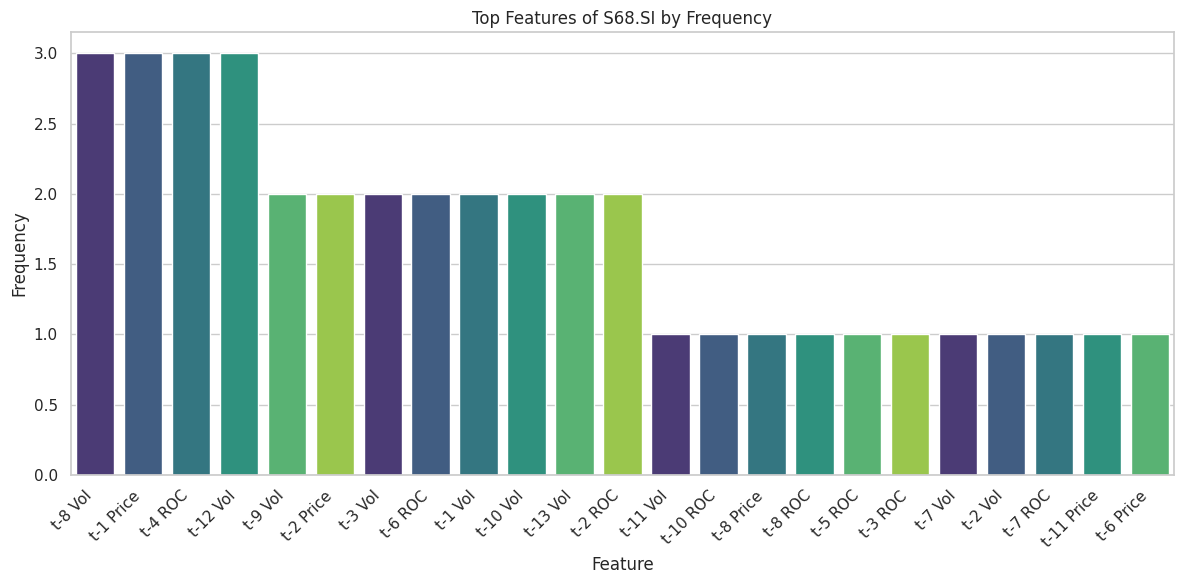

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV again
df = pd.read_csv("/home/priya/Desktop/fyp/Src alwin/Src/data/S68.SI/top3_mces_features_per_model.csv")

# Reshape the wide format into long format
long_df = pd.DataFrame({
    'Model': df['Model'].repeat(3).reset_index(drop=True),
    'Feature': pd.concat([df['Feature 1'], df['Feature 2'], df['Feature 3']], ignore_index=True),
    'Feedback': pd.concat([df['Feedback 1'], df['Feedback 2'], df['Feedback 3']], ignore_index=True)
})

# Count frequency
feature_counts = long_df['Feature'].value_counts().reset_index()
feature_counts.columns = ['Feature', 'Frequency']

# Average feedback
feature_avg = long_df.groupby('Feature')['Feedback'].mean().reset_index()
feature_avg.columns = ['Feature', 'Avg Feedback']

# Merge both
summary_df = pd.merge(feature_counts, feature_avg, on='Feature')

# Sort for plotting
summary_df = summary_df.sort_values(by='Frequency', ascending=False)

# Set plot style
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Barplot with color intensity based on feedback
bar = sns.barplot(
    data=summary_df,
    x='Feature',
    y='Frequency',
    palette=sns.color_palette("viridis", as_cmap=False)
)

plt.title('Top Features of S68.SI by Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [32]:
import pandas as pd
import os

tickers = ['S68.SI']  # Example tickers
base_data_dir = '/home/priya/Desktop/fyp/Src alwin/Src/data'

outcomes = {}
all_top_features = []

for ticker in tickers:
    ticker_df = pd.DataFrame()

    for t in range(1, 14):
        ticker_dir = os.path.join(base_data_dir, ticker, f'Tp{t}')  # Moved inside the loop
        file_name = f'Tp{t}_mcesdf.csv'
        file_path = os.path.join(ticker_dir, file_name)

        try:
            df = pd.read_csv(file_path)
            df = df.sort_values(by='weighted_scores', ascending=False)

            # Append top 6 features to the aggregated DataFrame
            top6_df = df[['cols']].head(6)
            ticker_df = pd.concat([ticker_df, top6_df], axis=0)

            # # Record the top 1 feature for this model
            # top_feature = df.iloc[0]
            # all_top_features.append({
            #     'Ticker': ticker,
            #     'Model': f't+{t}',
            #     'Top Feature': top_feature['cols'],
            #     'Weighted Score': top_feature['weighted_scores']
            # })
            # Record the top 3 features for this model
            top3_df = df[['cols', 'weighted_scores']].head(3)
            for i, row in top3_df.iterrows():
                all_top_features.append({
                    'Ticker': ticker,
                    'Model': f't+{t}',
                    'Rank': f'Top {i+1}',
                    'Feature': row['cols'],
                    'Weighted Score': row['weighted_scores']
                })


        except FileNotFoundError:
            print(f'File {file_path} not found, skipping...')

    # Process cumulative top features for the ticker
    ticker_df = ticker_df.groupby('cols').agg({'cols': 'count'})
    ticker_df = ticker_df.rename(columns={'cols': 'Count'})
    ticker_df = ticker_df.sort_values(by=['Count', 'cols'], ascending=[False, True])
    ticker_df = ticker_df.reset_index(drop=False)
    ticker_df = ticker_df.rename(columns={'cols': 'Feature'})

    # Clean feature names
# Final combined DataFrame of top features per model and ticker
top_features_df = pd.DataFrame(all_top_features)

# Clean feature names
top_features_df['Feature'] = top_features_df['Feature'].apply(
    lambda x: x.replace('_', ' ')
               .replace('Chg', '')
               .replace('PRoc1', 'ROC')
               .replace('Tm', 't-')
               .replace('x', '')
)

# Save to CSV if needed
top_features_df.to_csv('top_mces_features_by_model.csv', index=False)

# Display
print("Top 3 features per model:")
print(top_features_df)


Top 3 features per model:
    Ticker Model   Rank      Feature  Weighted Score
0   S68.SI   t+1  Top 1      t-2 ROC        0.006572
1   S68.SI   t+1  Top 2      t-9 Vol        0.001739
2   S68.SI   t+1  Top 3      t-7 Vol        0.001407
3   S68.SI   t+2  Top 1      t-8 Vol        0.020338
4   S68.SI   t+2  Top 2     t-10 ROC        0.004507
5   S68.SI   t+2  Top 3     t-12 Vol        0.001792
6   S68.SI   t+3  Top 1     t-12 Vol        0.014204
7   S68.SI   t+3  Top 2      t-1 Vol        0.003689
8   S68.SI   t+3  Top 3     t-13 Vol        0.002791
9   S68.SI   t+4  Top 1      t-2 Vol        0.007820
10  S68.SI   t+4  Top 2      t-3 Vol        0.004765
11  S68.SI   t+4  Top 3    t-2 Price        0.003473
12  S68.SI   t+5  Top 1    t-1 Price        0.015277
13  S68.SI   t+5  Top 2      t-6 ROC        0.014943
14  S68.SI   t+5  Top 3      t-4 ROC        0.007276
15  S68.SI   t+6  Top 1      t-8 ROC        0.002917
16  S68.SI   t+6  Top 2      t-9 Vol        0.002637
17  S68.SI   t+6  To